In [1]:
!pip install xlsxwriter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
boa7 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa7.xlsx')
boa8 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa8.xlsx')
boa8 = boa8.drop(0)
corlt7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corlt7.xlsx')
corstd7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corstd7.xlsx')
corstdp7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corstdp7.xlsx')
cort7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_cort7.xlsx')
drv7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv7.xlsx')
app7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_app7.xlsx')
att7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_att7.xlsx')
fin7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_fin7.xlsx')
pay7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_pay7.xlsx')
corlt8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corlt8.xlsx')
corstd8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corstd8.xlsx')
corstdp8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_corstdp8.xlsx')
cort8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_cort8.xlsx')
drv8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv8.xlsx')
app8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_app8.xlsx')
att8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_att8.xlsx')
fin8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_fin8.xlsx')
pay8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_pay8.xlsx')


In [6]:
ncd7 = pd.concat([corlt7, corstd7, corstdp7, cort7, drv7, app7, att7, fin7, pay7],ignore_index=True)
ncd8 = pd.concat([corlt8, corstd8, corstdp8, cort8, drv8, app8, att8, fin8, pay8],ignore_index=True)

In [5]:
ncd7 = ncd7[['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','미터링일시','사용량','약정여부']]
ncd8 = ncd8[['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','미터링일시','사용량','약정여부']]
ncd71 = ncd7.groupby(['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])[['미터링일시']].count().reset_index()
ncd72 = ncd7.groupby(['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])[['사용량']].mean().reset_index()
ncd81 = ncd8.groupby(['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])[['미터링일시']].count().reset_index()
ncd82 = ncd8.groupby(['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])[['사용량']].mean().reset_index()
ncd73 = pd.merge(ncd71, ncd72, how = 'inner', on = ['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])
ncd83 = pd.merge(ncd81, ncd82, how = 'inner', on = ['회원번호','회원그룹코드','청구유형코드명','미터링유형코드명','약정여부'])
ncd73

,회원번호,회원그룹코드,청구유형코드명,미터링유형코드명,약정여부,미터링일시,사용량
0,734,GEN,NAVER WORKS,웍스 코어 Lite,Y,31,34.290323
1,916,GEN,NAVER WORKS,웍스 코어 Standard,Y,31,10.000000
2,1001,INTL,NAVER WORKS,웍스 결재,N,31,78.000000
3,1001,INTL,NAVER WORKS,웍스 근태,N,31,78.000000
4,1001,INTL,NAVER WORKS,웍스 급여,N,31,78.000000
...,...,...,...,...,...,...,...
45166,3383727,GEN,NAVER WORKS,웍스 코어 체험판,N,1,1.000000
45167,3383737,GEN,NAVER WORKS,웍스 코어 체험판,N,1,1.000000
45168,3383738,GEN,NAVER WORKS,웍스 드라이브 체험판,N,1,1.000000
45169,3383741,GEN,NAVER WORKS,웍스 코어 체험판,N,1,1.000000


In [6]:
ncd73.columns = ['회원번호','회원그룹코드','구분3','상품명','약정여부', '7월미터링일수','7월사용량']
ncd83.columns = ['회원번호','회원그룹코드','구분3','상품명','약정여부', '8월미터링일수','8월사용량']
ncd73.loc[ncd73['상품명'].str[:5] == '웍스 드라', '구분3'] = 'WORKBOX'
ncd73.loc[ncd73['상품명'].isin(['웍스 결재','웍스 근태','웍스 재무','웍스 급여']), '구분3'] = 'WORKPLACE'
ncd83.loc[ncd83['상품명'].str[:5] == '웍스 드라', '구분3'] = 'WORKBOX'
ncd83.loc[ncd83['상품명'].isin(['웍스 결재','웍스 근태','웍스 재무','웍스 급여']), '구분3'] = 'WORKPLACE'
ncd73 = ncd73.groupby(['회원번호','회원그룹코드','구분3','약정여부'])[['7월미터링일수','7월사용량']].mean().reset_index()
ncd83 = ncd83.groupby(['회원번호','회원그룹코드','구분3','약정여부'])[['8월미터링일수','8월사용량']].mean().reset_index()
ncd73

,회원번호,회원그룹코드,구분3,약정여부,7월미터링일수,7월사용량
0,734,GEN,NAVER WORKS,Y,31.0,34.290323
1,916,GEN,NAVER WORKS,Y,31.0,10.000000
2,1001,INTL,NAVER WORKS,N,31.0,78.000000
3,1001,INTL,WORKPLACE,N,31.0,78.000000
4,1084,PATR,NAVER WORKS,Y,31.0,20.000000
...,...,...,...,...,...,...
39705,3383727,GEN,NAVER WORKS,N,1.0,1.000000
39706,3383737,GEN,NAVER WORKS,N,1.0,1.000000
39707,3383738,GEN,WORKBOX,N,1.0,1.000000
39708,3383741,GEN,NAVER WORKS,N,1.0,1.000000


In [7]:
boa7['회원번호'] = boa7['회원번호'].astype(str)
boa8['회원번호'] = boa8['회원번호'].astype(str)
# boa7 = boa7.loc[(boa7['상품명'].isin(['웍스 코어 Lite','웍스 코어 Standard','웍스 코어 Standard Plus','웍스 드라이브 Lite','웍스 드라이브 Standard','웍스 드라이브 Standard Plus','웍스 결재','웍스 재무','웍스 근태','웍스 급여',
#                                  'NAVER WORKS BASIC','NAVER WORKS LITE'])),:]
boa71 = boa7.groupby(['회원번호','구분3','paid user 여부'])[['매출금액(당월)','이용금액(당월)']].sum().reset_index()

boa78 = pd.merge(boa71, boa8, how='right', on=['회원번호', '구분3','paid user 여부'])
boa78['매출금액(당월)_y'] = boa78['매출금액(당월)_y'].fillna(0)
boa78['매출금액(당월)_x'] = boa78['매출금액(당월)_x'].fillna(0)
boa78['이용금액(당월)_y'] = boa78['이용금액(당월)_y'].fillna(0)
boa78['이용금액(당월)_x'] = boa78['이용금액(당월)_x'].fillna(0)

boa78.loc[boa78['paid user 여부']!='paid','매출금액(당월)_x'] = boa78.loc[boa78['paid user 여부']!='paid','매출금액(전월)']

In [8]:
boa78.columns

Index(['회원번호', '구분3', 'paid user 여부', '매출금액(당월)_x', '이용금액(당월)_x', '회원명', '구분1',
       '구분2', '매출금액(당월)_y', '매출금액(전월)', '매출금액(전월대비증감)', '매출금액(전월대비%)',
       '이용금액(당월)_y', '이용금액(전월)', '이용금액(전월대비증감)', '이용금액(전월대비%)', '파트너명',
       '법인개인구분', '플랫폼', '리전명', '리전번호', '채널'],
      dtype='object')

In [10]:
boa78['매출증가액'] = boa78['매출금액(당월)_y'] - boa78['매출금액(당월)_x']
boa78['이용금액증가액'] = boa78['이용금액(당월)_y'] - boa78['이용금액(당월)_x']
boa78['aaa'] = boa78['매출증가액'] - boa78['매출금액(전월대비증감)']
boa78.loc[boa78['매출금액(전월)'] == 0, '매출금액(전월)'] = boa78.loc[boa78['매출금액(전월)'] == 0, '매출금액(당월)_x']
boa78.loc[boa78['매출금액(당월)_x'] == 0, '매출금액(당월)_x'] = boa78.loc[boa78['매출금액(당월)_x'] == 0, '매출금액(전월)']

In [11]:
boa78['이용금액증가액'].sum()

125738960.0

In [12]:
boa78[boa78['매출금액(당월)_x'] == 0]

,회원번호,구분3,paid user 여부,매출금액(당월)_x,이용금액(당월)_x,회원명,구분1,구분2,매출금액(당월)_y,매출금액(전월),...,이용금액(전월대비%),파트너명,법인개인구분,플랫폼,리전명,리전번호,채널,매출증가액,이용금액증가액,aaa
6,2692090,WORKPLACE,paid,0.0,0.0,로엘 법무법인,Business Application,Business Applications,928737.999925,0.0,...,-,(주)웅진,법인,민간,한국,1,파트너 매출,928737.999925,2063860.0,0.0
26,3282264,NAVER WORKS,paid,0.0,0.0,에이투플러스,Business Application,Business Applications,375400.000000,0.0,...,-,(주)후이즈,법인,민간,한국,1,파트너 매출,375400.000000,450580.0,0.0
31,3298152,NAVER WORKS,paid,0.0,0.0,(주)나라지식정보,Business Application,Business Applications,344500.000000,0.0,...,-,(주)후이즈,법인,민간,한국,1,파트너 매출,344500.000000,401930.0,0.0
34,2653674,WORKPLACE,paid,0.0,0.0,(주)프리츠,Business Application,Business Applications,320184.830357,0.0,...,-,(주)웅진,법인,민간,한국,1,파트너 매출,320184.830357,711510.0,0.0
35,2679284,WORKPLACE,paid,0.0,0.0,페스카로,Business Application,Business Applications,311211.437944,0.0,...,-,주식회사 페이지원,법인,민간,한국,1,파트너 매출,311211.437944,484120.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,3365903,WORKBOX,paid,0.0,0.0,디엘피디자인그룹,Business Application,Business Applications,1100.000000,0.0,...,-,-,법인,민간,한국,1,온라인 매출,1100.000000,1350.0,0.0
7603,3384734,WORKBOX,paid,0.0,0.0,(주)원텍솔루션,Business Application,Business Applications,1100.000000,0.0,...,-,-,법인,민간,한국,1,온라인 매출,1100.000000,1350.0,0.0
7649,3382306,NAVER WORKS,paid,0.0,0.0,엠첵,Business Application,Business Applications,1000.000000,0.0,...,-,-,법인,민간,한국,1,온라인 매출,1000.000000,1410.0,0.0
7650,3382775,NAVER WORKS,paid,0.0,0.0,반도산전(주),Business Application,Business Applications,1000.000000,0.0,...,-,(주)후이즈,법인,민간,한국,1,파트너 매출,1000.000000,1250.0,0.0


In [14]:
boa78 = boa78[['회원번호','회원명','구분3','paid user 여부','매출금액(당월)_x','이용금액(당월)_x','매출금액(당월)_y','이용금액(당월)_y','채널','매출증가액','이용금액증가액']]

In [15]:
boa78

,회원번호,회원명,구분3,paid user 여부,매출금액(당월)_x,이용금액(당월)_x,매출금액(당월)_y,이용금액(당월)_y,채널,매출증가액,이용금액증가액
0,3357944,GS파워,NAVER WORKS,paid,6.196000e+05,717470.0,3.202100e+06,3707700,파트너 매출,2.582500e+06,2990230.0
1,3030124,삼구아이앤씨,NAVER WORKS,paid,3.719200e+06,3719220.0,5.828500e+06,5828500,파트너 매출,2.109300e+06,2109280.0
2,10009,한국조세재정연구원,NAVER WORKS,paid,1.997800e+06,2630440.0,3.805500e+06,5010630,파트너 매출,1.807700e+06,2380190.0
3,2604340,주식회사 드웰링,WORKPLACE,paid,6.951880e+05,695210.0,2.262000e+06,2262000,온라인 매출,1.566812e+06,1566790.0
4,3230053,(주)커넥트웨이브,WORKPLACE,paid,3.203062e+06,7910630.0,4.639790e+06,9519050,파트너 매출,1.436728e+06,1608420.0
...,...,...,...,...,...,...,...,...,...,...,...
30971,2692823,알피코프,NAVER WORKS,paid,5.216400e+06,6259740.0,4.688700e+06,5626450,파트너 매출,-5.277000e+05,-633290.0
30972,3349784,(주)유니원커뮤니케이션즈,NAVER WORKS,-,6.972000e+05,0.0,0.000000e+00,0,-,-6.972000e+05,0.0
30973,2819860,에듀윌,NAVER WORKS,paid,2.167100e+06,2528350.0,5.365000e+05,2452250,영업 매출,-1.630600e+06,-76100.0
30974,3355516,스냅스타,WORKBOX,-,1.762200e+06,0.0,0.000000e+00,0,-,-1.762200e+06,0.0


In [16]:
ncd73['회원번호'] = ncd73['회원번호'].astype(int)
ncd83['회원번호'] = ncd83['회원번호'].astype(int)
boa78['회원번호'] = boa78['회원번호'].astype(int)

In [17]:
merge78 = pd.merge(boa78, ncd73, how='left', on=['회원번호','구분3'])
merge78 = pd.merge(merge78, ncd83, how='left', on=['회원번호','구분3','회원그룹코드','약정여부'])

In [18]:
merge78.columns = ['회원번호','회원명','구분','paid user 여부','7월 매출금액','7월 이용금액','8월 매출금액','8월 이용금액','채널','매출증가액','이용금액증가액','회원그룹코드','약정여부','7월 미터링일수','7월 사용량','8월 미터링일수','8월 사용량']

In [19]:
merge78 = merge78[['회원번호','회원명','채널','회원그룹코드','구분','paid user 여부','약정여부','7월 매출금액','8월 매출금액','매출증가액','이용금액증가액',
                 '7월 이용금액','8월 이용금액','7월 미터링일수','8월 미터링일수','7월 사용량','8월 사용량']]
merge78['7월 미터링일수'] = merge78['7월 미터링일수'].fillna(0)
merge78['8월 미터링일수'] = merge78['8월 미터링일수'].fillna(0)
merge78['7월 이용금액'] = merge78['7월 이용금액'].fillna(0)
merge78['7월 미터링일수'] = merge78['7월 미터링일수'].astype(int)
merge78['8월 미터링일수'] = merge78['8월 미터링일수'].astype(int)
merge78.loc[merge78['7월 미터링일수']>31,'7월 미터링일수'] = 31
merge78.loc[merge78['8월 미터링일수']>31,'8월 미터링일수'] = 31
merge78

,회원번호,회원명,채널,회원그룹코드,구분,paid user 여부,약정여부,7월 매출금액,8월 매출금액,매출증가액,이용금액증가액,7월 이용금액,8월 이용금액,7월 미터링일수,8월 미터링일수,7월 사용량,8월 사용량
0,3357944,GS파워,파트너 매출,PATR,NAVER WORKS,paid,N,6.196000e+05,3202100.0,2.582500e+06,2990230.0,717470.0,3707700,26,0,321.384615,NaN
1,3357944,GS파워,파트너 매출,PATR,NAVER WORKS,paid,Y,6.196000e+05,3202100.0,2.582500e+06,2990230.0,717470.0,3707700,6,31,337.000000,337.064516
2,3030124,삼구아이앤씨,파트너 매출,PATR,NAVER WORKS,paid,N,3.719200e+06,5828500.0,2.109300e+06,2109280.0,3719220.0,5828500,31,31,309.935484,313.687500
3,10009,한국조세재정연구원,파트너 매출,NaN,NAVER WORKS,paid,NaN,1.997800e+06,3805500.0,1.807700e+06,2380190.0,2630440.0,5010630,0,0,NaN,NaN
4,2604340,주식회사 드웰링,온라인 매출,GEN,WORKPLACE,paid,N,6.951880e+05,2262000.0,1.566812e+06,1566790.0,695210.0,2262000,31,31,173.806452,168.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31730,3349784,(주)유니원커뮤니케이션즈,-,PATR,NAVER WORKS,-,Y,6.972000e+05,0.0,-6.972000e+05,0.0,0.0,0,22,31,140.363636,156.677419
31731,2819860,에듀윌,영업 매출,GEN,NAVER WORKS,paid,Y,2.167100e+06,536500.0,-1.630600e+06,-76100.0,2528350.0,2452250,31,31,361.193548,350.322581
31732,3355516,스냅스타,-,PATR,WORKBOX,-,N,1.762200e+06,0.0,-1.762200e+06,0.0,0.0,0,19,0,664.105263,NaN
31733,3355516,스냅스타,-,PATR,WORKBOX,-,Y,1.762200e+06,0.0,-1.762200e+06,0.0,0.0,0,13,31,700.384615,700.000000


In [20]:
new = merge78[(merge78['7월 매출금액']==0)&(merge78['8월 매출금액']>0)]
out = merge78[(merge78['7월 매출금액']>0)&(merge78['8월 매출금액']==0)]
original = merge78[~((merge78['7월 매출금액'] == 0) & (merge78['8월 매출금액'] > 0)) & ~((merge78['7월 매출금액'] > 0) & (merge78['8월 매출금액'] == 0))]

In [21]:
new2 = merge78[(merge78['7월 매출금액']==0)&(merge78['8월 매출금액']>0)]
out2 = merge78[(merge78['7월 매출금액']>0)&(merge78['8월 매출금액']==0)]
original = merge78[~((merge78['7월 매출금액'] == 0) & (merge78['8월 매출금액'] > 0)) & ~((merge78['7월 매출금액'] > 0) & (merge78['8월 매출금액'] == 0))]

In [22]:
new['채널'].unique()

array(['파트너 매출', '영업 매출', '온라인 매출'], dtype=object)

In [25]:
merge78 = merge78.sort_values(by='매출증가액',ascending=False)
new = new.sort_values(by='이용금액증가액',ascending=False)
out = out.sort_values(by='이용금액증가액',ascending=False)
original = original.sort_values(by='이용금액증가액',ascending=False)

In [27]:
#original.to_excel('/Users/user/Documents/업무문서/original78.xlsx',index=False)
#new.to_excel('/Users/user/Documents/업무문서/new78.xlsx',index=False)
#out.to_excel('/Users/user/Documents/업무문서/out78.xlsx',index=False)

In [123]:
merge78.loc[merge78['채널']=='영업 매출','채널'] = '온라인 매출'

In [181]:
a = ['온라인 매출','파트너 매출']
b = ['Y','N']
c = ['NAVER WORKS','WORKBOX','WORKPLACE']

for i in a :
    for j in b :
        l = merge78[(merge78['채널']==i)&(merge78['약정여부']==j)&(merge78['구분']=='WORKPLACE')]['8월 사용량'].sum()
        print(l)

20675.917243913576
5321.883106101699
22969.814985492405
3400.246675944783


In [252]:
sum = pd.read_excel('/Users/user/Documents/업무문서/summary매출.xlsx')

In [254]:
sum = sum.astype(int)
sum

,7월 이용금액,8월 이용금액,7월 매출금액,8월 매출금액,7월 사용량,8월 사용량
0,970673630,972133980,807399660,807338056,124099,124077
1,148600020,194288780,147553309,191912813,20936,19867
2,1296337160,1306095550,729037912,738009986,169714,169816
3,18333110,30581110,17560604,28314219,2903,2085
4,858160,1388820,663398,1063423,258,279
5,1123600,3143230,885314,2523372,620,287
6,18290,21000,10910,12600,3,3
7,18290,284590,10910,243369,110,110
8,94567640,99019170,66625318,70295236,20624,20675
9,35092010,73848120,31291910,68042573,6291,5321


In [258]:
index = ['온라인매출 약정','온라인매출 비약정','파트너매출 약정','파트너매출 비약정']
cor = sum.loc[[0,1,2,3],:]
place = sum.loc[[8,9,10,11],:]
all = sum.loc[[12,13,14,15],:]
cor['구분'] = index
cor.set_index('구분', inplace=True)
place['구분'] = index
place.set_index('구분', inplace=True)
all['구분'] = index
all.set_index('구분', inplace=True)
all

,7월 이용금액,8월 이용금액,7월 매출금액,8월 매출금액,7월 사용량,8월 사용량
구분,,,,,,
온라인매출 약정,1066099430,1072541970,874688376,878696715,144982,145032
온라인매출 비약정,184815630,271280130,179730533,262478758,27849,25476
파트너매출 약정,1411116110,1427531740,805136914,819976334,192555,192789
파트너매출 비약정,50756090,75420150,39273569,59617343,7330,5595


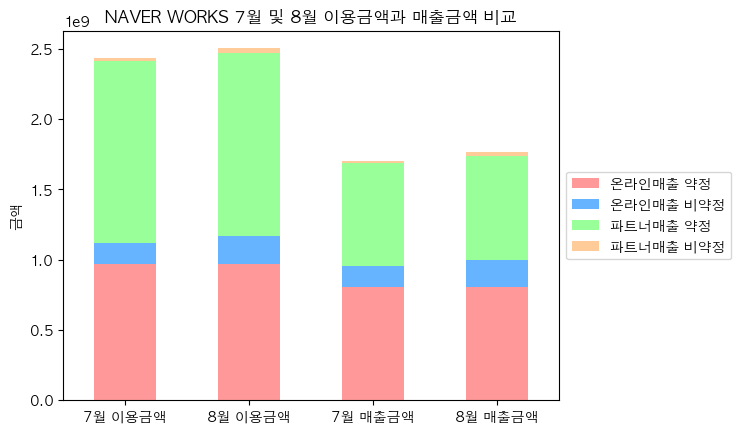

In [262]:
import matplotlib.pyplot as plt

# MacOS 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 예시 데이터 (merge78의 해당 4개의 컬럼)
columns = ['7월 이용금액', '8월 이용금액', '7월 매출금액', '8월 매출금액']
values = cor[columns]

# 데이터를 전치하여 열을 바의 축으로 사용
values_transposed = values.T

# Stacked Bar Chart 생성
values_transposed.plot(kind='bar', stacked=True,color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# 범례 위치 설정 (맨 아래 왼쪽)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 및 축 설정
plt.ylabel('금액')
plt.title('NAVER WORKS 7월 및 8월 이용금액과 매출금액 비교')
plt.xticks(rotation=0)  # X축 라벨을 가독성 있게 설정

# 그래프 표시
plt.show()

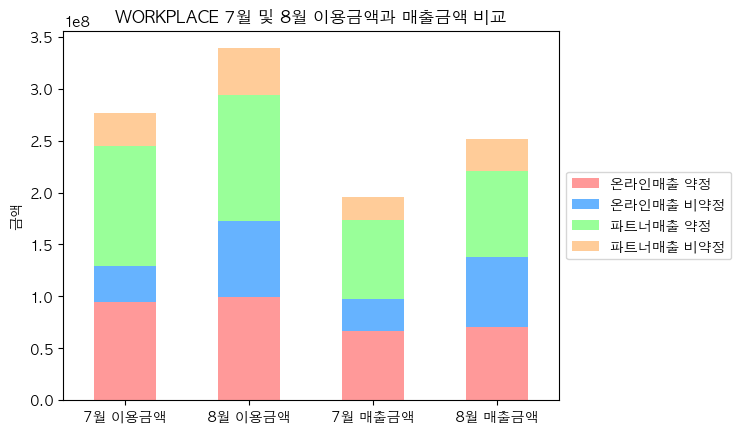

In [264]:
import matplotlib.pyplot as plt

# MacOS 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 예시 데이터 (merge78의 해당 4개의 컬럼)
columns = ['7월 이용금액', '8월 이용금액', '7월 매출금액', '8월 매출금액']
values = place[columns]

# 데이터를 전치하여 열을 바의 축으로 사용
values_transposed = values.T

# Stacked Bar Chart 생성
values_transposed.plot(kind='bar', stacked=True,color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# 범례 위치 설정 (맨 아래 왼쪽)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 및 축 설정
plt.ylabel('금액')
plt.title('WORKPLACE 7월 및 8월 이용금액과 매출금액 비교')
plt.xticks(rotation=0)  # X축 라벨을 가독성 있게 설정

# 그래프 표시
plt.show()

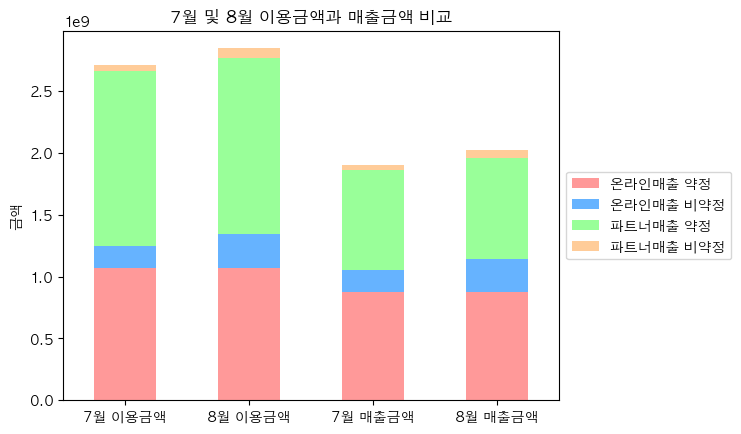

In [266]:
import matplotlib.pyplot as plt

# MacOS 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 예시 데이터 (merge78의 해당 4개의 컬럼)
columns = ['7월 이용금액', '8월 이용금액', '7월 매출금액', '8월 매출금액']
values = all[columns]

# 데이터를 전치하여 열을 바의 축으로 사용
values_transposed = values.T

# Stacked Bar Chart 생성
values_transposed.plot(kind='bar', stacked=True,color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# 범례 위치 설정 (맨 아래 왼쪽)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 및 축 설정
plt.ylabel('금액')
plt.title('7월 및 8월 이용금액과 매출금액 비교')
plt.xticks(rotation=0)  # X축 라벨을 가독성 있게 설정

# 그래프 표시
plt.show()